# Face Emotion Recognition with Deep Learning

<img src="df.jpg" alt="deepface" width="600">

In this Jupyter notebook, we will analyze facial emotions using [**DeepFace**](https://en.wikipedia.org/wiki/DeepFace), an open-source facial recognition system developed by Facebook's research team.

DeepFace excels at identifying human faces in digital images, leveraging a nine-layer neural network with over 120 million connection weights. Trained on four million images sourced from Facebook users, the system achieves remarkable accuracy.

According to the Facebook Research team, DeepFace attains a performance of **97.53%** of accuracy.

In certain scenarios, DeepFace even surpasses human performance.

### Step 1: import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import deepface 
from deepface import DeepFace

### Step 2: load and analyze the image

In [2]:
img = cv2.imread('surprise.jpeg') # load image

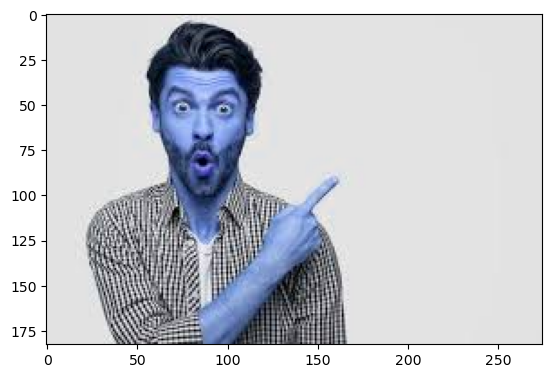

In [3]:
plt.imshow(img) # opencv loads images in BGR format

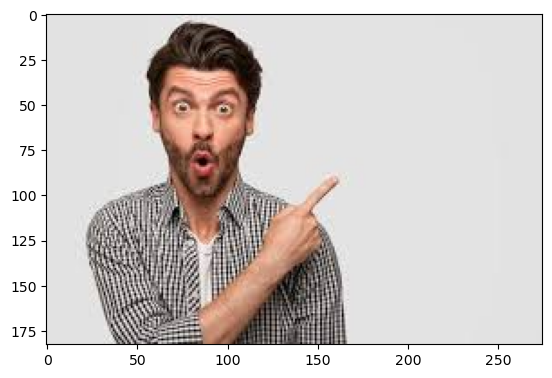

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # we convert it to RGB

In [5]:
predictions = DeepFace.analyze(img) # analyze the image

Action: race: 100%|██████████| 4/4 [00:18<00:00,  4.69s/it]   


In [6]:
predictions # print the predictions

[{'emotion': {'angry': 9.372880782620996e-06,
   'disgust': 1.0336798420256671e-11,
   'fear': 0.0017893209587782621,
   'happy': 2.7275428582385075e-07,
   'sad': 7.325695605686633e-08,
   'surprise': 99.99819993972778,
   'neutral': 2.298536557756529e-13},
  'dominant_emotion': 'surprise',
  'region': {'x': 55,
   'y': 26,
   'w': 65,
   'h': 65,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.91,
  'age': 25,
  'gender': {'Woman': 0.0002492044131940929, 'Man': 99.99974966049194},
  'dominant_gender': 'Man',
  'race': {'asian': 0.6129206623882055,
   'indian': 16.97181463241577,
   'black': 1.3890691101551056,
   'white': 41.27785861492157,
   'middle eastern': 21.49033695459366,
   'latino hispanic': 18.257997930049896},
  'dominant_race': 'white'}]

In [7]:
type(predictions) # check the type of the predictions

list

The prediction is a list, for easier access and manipulation purposes, we need to transform it into a dictionary

In [8]:
if isinstance(predictions, list) and len(predictions) == 1: # if the predictions is a list and has only one element
    predictions = predictions[0] # get the first element

In [9]:
type(predictions) # check the type of the predictions

dict

### Step 3: download and load the Haar Cascade XML file

The Haar Cascade XML is a pre-trained file used for detecting faces (not emotions) in images or videos. It contains data for recognizing patterns like eyes, noses, and mouths.
It can be download from the official [OpenCV GitHub repository](https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml). 

### Step 4: detect face

In [10]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # load the pre-trained face detection model

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale
faces = faceCascade.detectMultiScale(gray, 1.1, 4) # detect faces in the image

for (x, y, w, h) in faces: # iterate over the faces
    cv2.rectangle(img, (x, y), (x+w, y+h), (0)) # draw a rectangle around the face

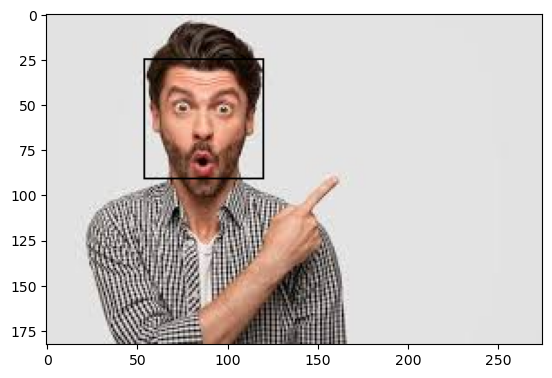

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # show the image with the face detection

### Step 5: detect emotion

In [12]:
font = cv2.FONT_HERSHEY_SIMPLEX # set the font

cv2.putText(img, # the image
            predictions['dominant_emotion'], # the text
            (0, 50), # the position
            font, 1, # the font and the font size
            (0, 0, 255), # the color
            2, # the thickness
            cv2.LINE_4) ; # the line type


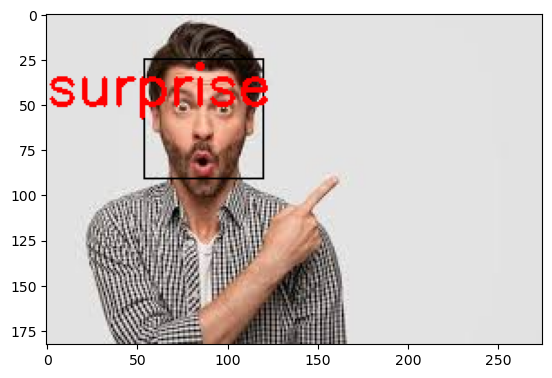

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # show the image with the face detection and the emotion

#### Check with other image sample

In [14]:
img1 = cv2.imread('sad.jpg')

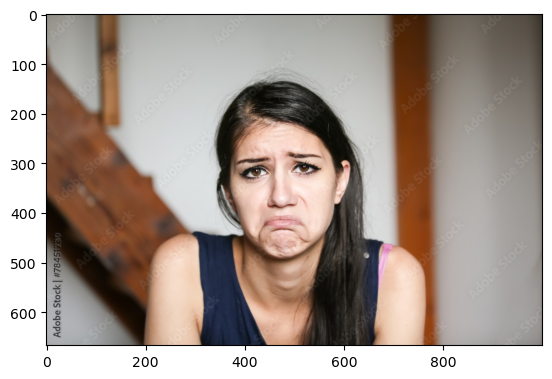

In [15]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [16]:
predictions1 = DeepFace.analyze(img1)

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]  


In [17]:
predictions1

[{'emotion': {'angry': 0.0817354244645685,
   'disgust': 0.0001451498633286974,
   'fear': 44.57017481327057,
   'happy': 3.16126569366304e-09,
   'sad': 55.06589412689209,
   'surprise': 8.617922730991268e-05,
   'neutral': 0.28197162318974733},
  'dominant_emotion': 'sad',
  'region': {'x': 344,
   'y': 211,
   'w': 262,
   'h': 262,
   'left_eye': (516, 310),
   'right_eye': (415, 318)},
  'face_confidence': 0.91,
  'age': 28,
  'gender': {'Woman': 99.99961853027344, 'Man': 0.0003779193093578215},
  'dominant_gender': 'Woman',
  'race': {'asian': 4.5607104897499084,
   'indian': 8.681702613830566,
   'black': 0.6367338821291924,
   'white': 22.261208295822144,
   'middle eastern': 38.33741843700409,
   'latino hispanic': 25.522229075431824},
  'dominant_race': 'middle eastern'}]

### Step 6: live demo

In [19]:
import cv2
from deepface import DeepFace

# load the face cascade for detecting faces
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# open the webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True: # Loop until 'q' is pressed
    ret, frame = cap.read() # Read the frame
    
    try:
        # analyze emotions in the frame
        results = DeepFace.analyze(frame, actions=['emotion'])

        # handle multiple faces
        if isinstance(results, list) and len(results) > 0:
            dominant_emotion = results[0]['dominant_emotion']  # extract the first face's dominant emotion
        elif isinstance(results, dict):
            dominant_emotion = results['dominant_emotion']    # single-face result
        else:
            dominant_emotion = "Unknown"                     # fallback if no emotion detected

    except Exception as e:
        dominant_emotion = "Error" # handle errors
        print(f"Error analyzing frame: {e}")

    # convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # display the dominant emotion
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                dominant_emotion,  
                (50, 50),
                font, 1,
                (0, 0, 255),
                2,
                cv2.LINE_4)

    # show the output
    cv2.imshow('Demo video', frame)

    # exit if 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
